In [7]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/ClassModules/Module7_Similarity/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 761, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 761 (delta 74), reused 161 (delta 73), pack-reused 598
Receiving objects: 100% (761/761), 139.76 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (337/337), done.
Updating files: 100% (131/131), done.
/content/DS4B_Sp24/ClassModules/DS4B_Sp24/ClassModules/Module7_Similarity


In [8]:
%ls

data/                   KMeans.ipynb                            Module_Clustering.ipynb
HierClustShmueli.ipynb  Module_Classification-kNN_2moons.ipynb


In [9]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [11]:
utilities_df = pd.read_csv('data/Utilities.csv')
# set row names to the utilities column
utilities_df.set_index('Company', inplace=True)
# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
# compute Euclidean distance
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


In [13]:
#need to normalize:

# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
# compute normalized distance based on Sales and Fuel Cost
utilities_df_norm[['Sales', 'Fuel_Cost']]
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']],
metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)#

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,1.490116e-08,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638e+00,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,5.214913e-01,2.761745e+00,1.252350
Boston,2.010329e+00,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654e+00,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255e+00,1.100595e+00,1.479261
Central,7.741795e-01,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777e+00,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,8.389668e-01,2.034824e+00,0.510365
Commonwealth,7.587375e-01,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230e+00,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,2.434079e-01,2.547116e+00,1.502093
NY,3.021907e+00,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561e+00,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786e+00,9.525069e-01,2.328691
Florida,1.244422e+00,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123e+00,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417e+00,2.016493e+00,0.313847
Hawaiian,1.885248e+00,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189e+00,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256e+00,8.799342e-01,0.929414
Idaho,1.265638e+00,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,2.980232e-08,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813e+00,3.720421e+00,1.980715
Kentucky,4.612918e-01,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417e+00,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,4.267801e-01,2.308613e+00,0.929141


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [110.0, 110.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [175.0, 175.0, 200.0, 200.0],
  [160.0, 160.0, 187.5, 187.5],
  [125.0, 125.0, 173.75, 173.75],
  [54.375, 54.375, 149.375, 149.375],
  [35.0, 35.0, 101.875, 101.875],
  [12.5, 12.5, 68.4375, 68.4375]],
 'dcoord': [[0.0, 2.2014571837316304, 2.2014571837316304, 0.0],
  [0.0, 3.4462747386146946, 3.4462747386146946, 2.2014571837316304],
  [0.0, 1.3841237675943323, 1.3841237675943323, 0.0],
  [0.0, 2.1677254242040145, 2.1677254242040145, 1.3841237675943323],
  [0.0, 2.452041730020232, 2.452041730020232, 2.1677254242040145],
  [0.0, 

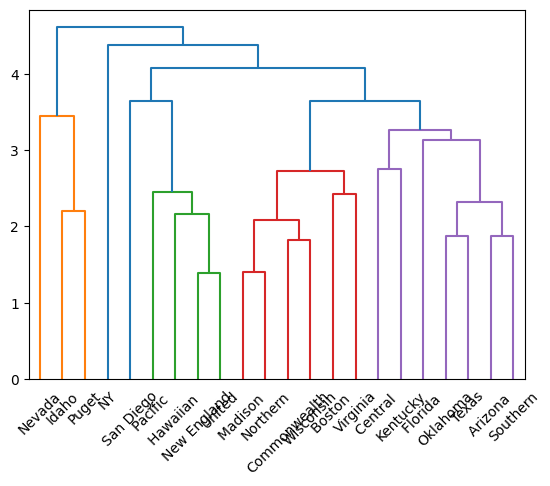

In [17]:
# code for hierarchical

# in linkage() set argument method =
# 'single', 'complete', 'average', 'weighted', centroid', 'median', 'ward'
Z = linkage(utilities_df_norm, method='single')
#dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
Z = linkage(utilities_df_norm, method='average')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)